<a href="https://colab.research.google.com/github/Altemir1/Data_analysis/blob/main/Reviews_Analysis_Paysend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data collection


In [2]:
!pip install google-play-scraper


In [6]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=94cf8e3142293a97dc6d32b0cd69e5c0ca0c2df999c83b24b2014d045c0c915e
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [2]:
import pandas as pd
from google_play_scraper import reviews_all, Sort
from googletrans import Translator

def fetch_reviews(app_id, countries):
    all_reviews = []
    translator = Translator()
    for country in countries:
        print(f"Fetching reviews from {country}...")
        try:
            country_reviews = reviews_all(
                app_id,
                lang='en',  # Set language to English
                country=country,  # Country from the list
                sort=Sort.NEWEST,  # Sort by newest
                sleep_milliseconds=1000  # Delay to prevent rate limits
            )
            # Translate non-English reviews
            for review in country_reviews:
                try:
                    detected_lang = 'en'  # Assuming default as English
                    if detected_lang != 'en':
                        review['content'] = translator.translate(review['content'], dest='en').text
                except Exception as e:
                    print(f"Error translating review: {str(e)}")
            all_reviews.extend(country_reviews)
            print(f"Collected {len(country_reviews)} reviews from {country}.")
        except Exception as e:
            print(f"Failed to fetch reviews from {country}: {str(e)}")
    return all_reviews

# Updated list of countries
countries = [
    'us', 'in', 'gb', 'ca', 'au', 'ng', 'ph', 'za', 'nz', 'ie', 'kz', 'ru',
    'de', 'fr', 'it', 'es', 'ua', 'pl', 'ro', 'nl'
]

# Fetch reviews for the app
app_reviews = fetch_reviews('com.paysend.app', countries)

# Convert the list of reviews to a DataFrame
reviews_df = pd.DataFrame(app_reviews)
reviews_df = reviews_df[['score', 'content', 'at']]
reviews_df.columns = ['rating', 'comment', 'date']

# Display the DataFrame
print(reviews_df.head())
print(f"Total reviews collected: {len(reviews_df)}")


Fetching reviews from us...
Collected 398 reviews from us.
Fetching reviews from in...
Collected 398 reviews from in.
Fetching reviews from gb...
Collected 199 reviews from gb.
Fetching reviews from ca...
Collected 597 reviews from ca.
Fetching reviews from au...
Collected 597 reviews from au.
Fetching reviews from ng...
Collected 199 reviews from ng.
Fetching reviews from ph...
Collected 1393 reviews from ph.
Fetching reviews from za...
Collected 796 reviews from za.
Fetching reviews from nz...
Collected 597 reviews from nz.
Fetching reviews from ie...
Collected 398 reviews from ie.
Fetching reviews from kz...
Collected 1393 reviews from kz.
Fetching reviews from ru...
Collected 199 reviews from ru.
Fetching reviews from de...
Collected 597 reviews from de.
Fetching reviews from fr...
Collected 1194 reviews from fr.
Fetching reviews from it...
Collected 597 reviews from it.
Fetching reviews from es...
Collected 199 reviews from es.
Fetching reviews from ua...
Collected 597 reviews fro

In [12]:
reviews_df

,rating,comment,date
0,5,I used this app this is so easy and fastest ap...,2024-05-03 22:13:45
1,1,To much you have to go through.,2024-05-03 17:51:54
2,1,"It worked wonderful the first time, money came...",2024-05-01 21:17:33
3,1,You will be subjected to ID check but it could...,2024-05-01 18:08:37
4,1,"Cant even connect to server, scam.",2024-05-01 13:33:45
...,...,...,...
10343,1,why my money Pending 3days what is ur action t...,2023-12-12 01:10:07
10344,1,If you want your transaction to take 5 days to...,2023-12-10 22:10:18
10345,1,One of worst app ever seen before. There is no...,2023-12-09 16:04:35
10346,1,"Since 4 days transaction not success, support ...",2023-12-06 05:50:30


Descriptive analysis

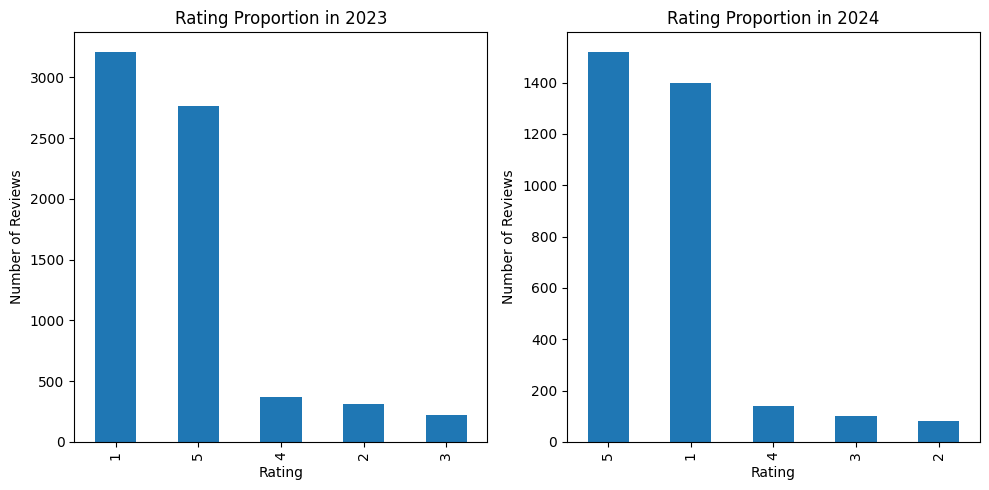

In [29]:

import matplotlib.pyplot as plt

# Filter reviews by year
reviews_2023 = reviews_df[reviews_df['date'].dt.year == 2023]
reviews_2024 = reviews_df[reviews_df['date'].dt.year == 2024]

# Count ratings for each year
rating_counts_2023 = reviews_2023['rating'].value_counts()
rating_counts_2024 = reviews_2024['rating'].value_counts()

# Create bar charts
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
rating_counts_2023.plot(kind='bar')
plt.title('Rating Proportion in 2023')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

plt.subplot(1, 2, 2)
rating_counts_2024.plot(kind='bar')
plt.title('Rating Proportion in 2024')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


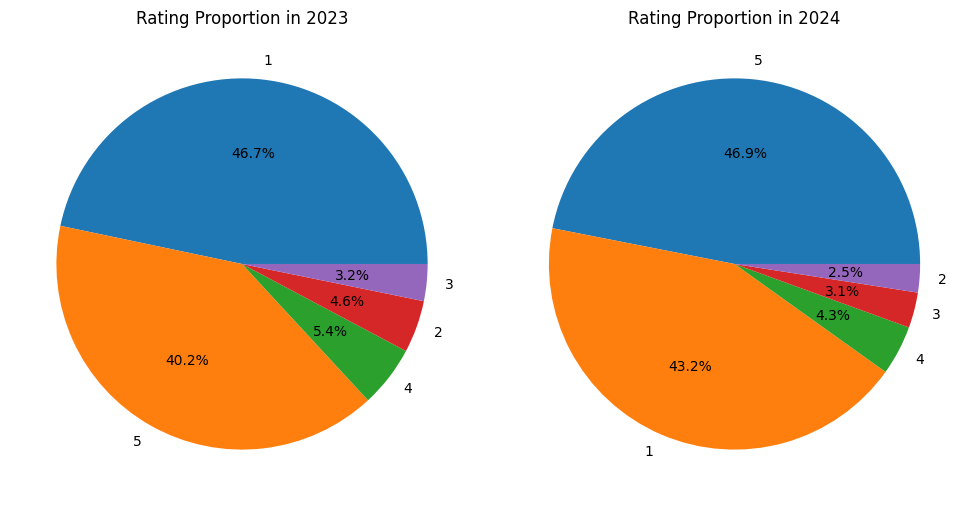

In [30]:

import matplotlib.pyplot as plt
# Calculate the total number of reviews for each year
total_reviews_2023 = len(reviews_2023)
total_reviews_2024 = len(reviews_2024)

# Calculate the proportion of each rating for each year
rating_proportions_2023 = (rating_counts_2023 / total_reviews_2023) * 100
rating_proportions_2024 = (rating_counts_2024 / total_reviews_2024) * 100

# Create pie charts
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(rating_proportions_2023, labels=rating_counts_2023.index, autopct="%1.1f%%")
plt.title('Rating Proportion in 2023')

plt.subplot(1, 2, 2)
plt.pie(rating_proportions_2024, labels=rating_counts_2024.index, autopct="%1.1f%%")
plt.title('Rating Proportion in 2024')

plt.tight_layout()
plt.show()


In [3]:
df_2023 = len(reviews_df[reviews_df['date'].dt.year == 2023])
df_2024 = len(reviews_df[reviews_df['date'].dt.year == 2024])

print(f"Number of reviews in 2023: {df_2023}")
print(f"Number of reviews in 2024: {df_2024}")


rating_list = [1, 2, 3, 4, 5]
average_length_2023 = []
average_length_2024 = []
for rating in rating_list:
    rating_ = reviews_df[(reviews_df['date'].dt.year == 2023) & (reviews_df['rating'] == rating)]
    average = rating_['comment'].str.len().mean()
    average_length_2023.append(average)


for rating in rating_list:
    rating_ = reviews_df[(reviews_df['date'].dt.year == 2024) & (reviews_df['rating'] == rating)]
    average = rating_['comment'].str.len().mean()
    average_length_2024.append(average)



Number of reviews in 2023: 6873
Number of reviews in 2024: 3240


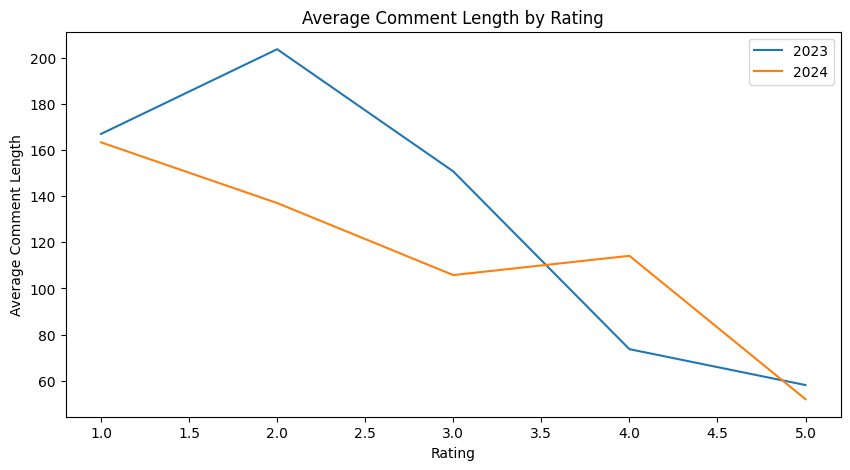

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.plot(rating_list, average_length_2023, label="2023")
plt.plot(rating_list, average_length_2024, label="2024")

plt.xlabel("Rating")
plt.ylabel("Average Comment Length")
plt.title("Average Comment Length by Rating")
plt.legend()
plt.show()


Text formatting for NLP

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
from collections import Counter

# Assume 'reviews_df' is your DataFrame and 'comment' is the column with review texts
reviews_df['processed_comments'] = reviews_df['comment'].apply(preprocess)

# Flatten the list of all words in all reviews and count them
all_words = ' '.join(reviews_df['processed_comments']).split()
word_counts = Counter(all_words)

# Display the 10 most common words
print(word_counts.most_common(10))


[('money', 4258), ('app', 3940), ('send', 2004), ('transfer', 1904), ('time', 1352), ('good', 1304), ('account', 1258), ('service', 1198), ('use', 1156), ('paysend', 1128)]


In [30]:
!pip install transformers


Sentiment Analysis

In [6]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Initialize the sentiment analysis pipeline with a lighter model
sentiment_analyzer = pipeline('sentiment-analysis', model='distilbert-base-uncased')

# Function to perform sentiment analysis in batches and provide progress updates
def analyze_sentiment_in_batches(reviews, batch_size=32):
    results = []
    total = len(reviews)
    for i in tqdm(range(0, total, batch_size), desc="Analyzing Sentiment"):
        batch = reviews[i:i + batch_size]
        batch_results = sentiment_analyzer(batch)
        results.extend(batch_results)
        # Optional: Insert code here to save results intermittently to a file or database
    return results


# Apply sentiment analysis to the DataFrame in batches
reviews_df['sentiment_results'] = analyze_sentiment_in_batches(reviews_df['comment'].tolist())

# Extracting sentiment and score from the results
reviews_df['sentiment'] = [result['label'] for result in reviews_df['sentiment_results']]
reviews_df['sentiment_score'] = [result['score'] for result in reviews_df['sentiment_results']]

# Display the DataFrame with sentiment results
print(reviews_df[['comment', 'sentiment', 'sentiment_score']])


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Analyzing Sentiment: 100%|██████████| 380/380 [18:23<00:00,  2.90s/it]

                                                 comment sentiment  \
0      I used this app this is so easy and fastest ap...   LABEL_0   
1                        To much you have to go through.   LABEL_0   
2      It worked wonderful the first time, money came...   LABEL_0   
3      You will be subjected to ID check but it could...   LABEL_0   
4                     Cant even connect to server, scam.   LABEL_0   
...                                                  ...       ...   
12134                               Thank u for this app   LABEL_0   
12135  Website didn't let me register, so I tried the...   LABEL_0   
12136  Very grateful to have this app to send money t...   LABEL_0   
12137         Sent £1 to be safe and revieved graet app!   LABEL_0   
12138  Amazing service. One of the best money transfe...   LABEL_0   

       sentiment_score  
0             0.533634  
1             0.552388  
2             0.548063  
3             0.540422  
4             0.511633  
...      

In [9]:
reviews_df

,rating,comment,date,sentiment_results,sentiment,sentiment_score
0,5,I used this app this is so easy and fastest ap...,2024-05-03 22:13:45,"{'label': 'LABEL_0', 'score': 0.5336335301399231}",LABEL_0,0.533634
1,1,To much you have to go through.,2024-05-03 17:51:54,"{'label': 'LABEL_0', 'score': 0.5523878931999207}",LABEL_0,0.552388
2,1,"It worked wonderful the first time, money came...",2024-05-01 21:17:33,"{'label': 'LABEL_0', 'score': 0.548062801361084}",LABEL_0,0.548063
3,1,You will be subjected to ID check but it could...,2024-05-01 18:08:37,"{'label': 'LABEL_0', 'score': 0.5404221415519714}",LABEL_0,0.540422
4,1,"Cant even connect to server, scam.",2024-05-01 13:33:45,"{'label': 'LABEL_0', 'score': 0.5116331577301025}",LABEL_0,0.511633
...,...,...,...,...,...,...
12134,5,Thank u for this app,2023-03-16 01:54:13,"{'label': 'LABEL_0', 'score': 0.5428071022033691}",LABEL_0,0.542807
12135,1,"Website didn't let me register, so I tried the...",2023-03-15 21:51:19,"{'label': 'LABEL_0', 'score': 0.5372818112373352}",LABEL_0,0.537282
12136,4,Very grateful to have this app to send money t...,2023-03-15 19:53:14,"{'label': 'LABEL_0', 'score': 0.5041845440864563}",LABEL_0,0.504185
12137,5,Sent £1 to be safe and revieved graet app!,2023-03-15 17:24:09,"{'label': 'LABEL_0', 'score': 0.5301477313041687}",LABEL_0,0.530148


Ngram annalyzer

In [14]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


# Filter out only negative reviews
negative_reviews_df = reviews_df[reviews_df['rating'] <= 3]

# Preprocess comments (assuming not preprocessed)
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

negative_reviews_df['processed_comment'] = negative_reviews_df['comment'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-14-ba49aa65d6dc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_df['processed_comment'] = negative_reviews_df['comment'].apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

# N-gram analysis with progress updates
vectorizer = CountVectorizer(ngram_range=(3, 5))
ngrams = vectorizer.fit_transform(tqdm(negative_reviews_df['processed_comment'], desc="Vectorizing comments"))

ngram_features = vectorizer.get_feature_names_out()
ngram_counts = ngrams.sum(axis=0).A1  # Convert to a flat array for easier handling

# Create a dictionary of n-grams and their counts
ngram_count_dict = {ngram: count for ngram, count in zip(ngram_features, ngram_counts)}
sorted_ngrams = sorted(ngram_count_dict.items(), key=lambda item: item[1], reverse=True)

# Display the most common n-grams
print("Most common n-grams in negative reviews:", sorted_ngrams[:100])


In [21]:
for ngram, count in sorted_ngrams[:500]:
    print(f"{ngram}: {count}")



tried send money: 159
get money back: 91
app send money: 82
worst app ever: 80
send money friend: 62
ca send money: 61
bank card details: 60
want send money: 53
return money back: 46
use app send: 42
use app send money: 42
customer service joke: 40
en unos minutos: 40
gcash account today: 40
money gcash account: 40
money gcash account today: 40
send money internationally: 40
send money nigeria: 40
without document confirmation: 40
selfie id selfie: 39
trying send money: 39
customer service terrible: 37
ca even contact: 35
cell phone number: 35
send money receiver: 35
try send money: 35
easy send money: 34
able make transfers: 32
quick easy send: 32
quick easy send money: 32
access bank branches: 30
documents every time: 30
give money back: 30
still receive money: 30
took days get: 30
transfer money always: 30
app ever seen: 27
app waste time: 27
horrible customer service: 27
id selfie card: 27
money got stuck: 27
selfie id selfie card: 27
send money times: 27
sucks would recommend: 27


WordCloud

In [41]:


# Sort n-grams by frequency descending
sorted_ngrams.sort(key=lambda x: x[1], reverse=True)

# Filter n-grams, removing those that are subsets of higher frequency n-grams
filtered_ngrams = []
seen_phrases = set()

for ngram, count in sorted_ngrams:
    # Convert ngram into a frozenset of words for subset checking
    ngram_set = frozenset(ngram.split())
    if not any(ngram_set.issubset(seen_words) for seen_words in seen_phrases):
        filtered_ngrams.append((ngram, count))
        seen_phrases.add(ngram_set)

# Now limit to the top 30 n-grams
filtered_ngrams = filtered_ngrams[:30]


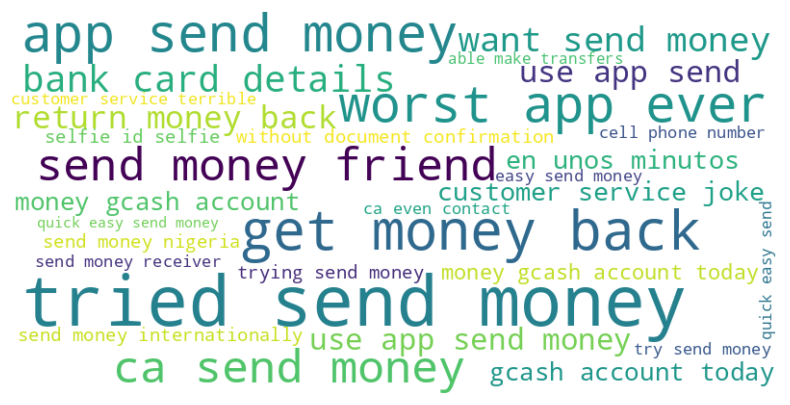

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert to dictionary
ngram_frequency_dict = {ngram: freq for ngram, freq in filtered_ngrams}

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(ngram_frequency_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()
